In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2

In [2]:
print(tf.__version__)

2.3.0


In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [4]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib
from skimage.filters import laplace
from skimage import io

In [5]:
# C:\Users\patel\Desktop\Mini_Project\dMini_Projectataset\individual\elbow
training_dir = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/hand/train/"
testing_dir  = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/hand/validation/"


print("DATA IMPORTING FROM THE DIRECTORY...")
training_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    validation_split=0.2,
#     rescale = 1./255,
#     horizontal_flip = True,
#     vertical_flip = True,
    rotation_range = 15,
    fill_mode = 'nearest'
)


training_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle=True,
    class_mode = 'categorical',
    batch_size = 32,
    subset= 'training'
)

validation_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 16,
    subset = 'validation'
)
print("DATA LOADED")

DATA IMPORTING FROM THE DIRECTORY...
Found 4436 images belonging to 2 classes.
Found 1107 images belonging to 2 classes.
DATA LOADED


In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, MaxPooling2D, Conv2D,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# #Trial 1

# model = Sequential([
#     Conv2D(64, 7, activation='relu',padding='same',input_shape=[224,224,3]),
#     MaxPooling2D(2),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dropout(0.3),
#     Dense(64,activation='relu'),
#     Dropout(0.25),
#     Dense(2,activation='softmax')
# ])

In [8]:
#trial - 2 - EffNetB0
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    input_shape=(256,256,3),
    include_top = False,
    weights = 'imagenet'
)

for layer in base_model.layers[:-22]:
    layer.trainable = False

x = Flatten()(base_model.output)


x = Dropout(0.3)(x)
x = Dense(32,activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(16,activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [10]:
my_callback = EarlyStopping(
    patience=5,
    monitor = 'val_loss',
    min_delta = 0.0005
)
adam = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['acc'])

history = model.fit(
    training_gen,
    epochs = 50,
    validation_data= validation_gen,
)

Epoch 1/50
139/139 [==============================] - 96s 687ms/step - loss: 0.6475 - acc: 0.7078 - val_loss: 0.5862 - val_acc: 0.7326
Epoch 2/50
139/139 [==============================] - 74s 532ms/step - loss: 0.5657 - acc: 0.7320 - val_loss: 0.5430 - val_acc: 0.7326
Epoch 3/50
139/139 [==============================] - 74s 531ms/step - loss: 0.5556 - acc: 0.7304 - val_loss: 0.5607 - val_acc: 0.7272
Epoch 4/50
139/139 [==============================] - 75s 537ms/step - loss: 0.5497 - acc: 0.7320 - val_loss: 0.5492 - val_acc: 0.7326
Epoch 5/50
139/139 [==============================] - 74s 534ms/step - loss: 0.5404 - acc: 0.7322 - val_loss: 0.5928 - val_acc: 0.7326
Epoch 6/50
139/139 [==============================] - 76s 546ms/step - loss: 0.5206 - acc: 0.7322 - val_loss: 0.5509 - val_acc: 0.7326
Epoch 7/50
139/139 [==============================] - 75s 540ms/step - loss: 0.5023 - acc: 0.7322 - val_loss: 0.5447 - val_acc: 0.7326
Epoch 8/50
139/139 [==============================] - 7

In [11]:
import matplotlib.pyplot as plt

        loss       acc   val_loss   val_acc
0   0.647542  0.707845   0.586216  0.732611
1   0.565661  0.731966   0.543028  0.732611
2   0.555596  0.730388   0.560672  0.727191
3   0.549655  0.731966   0.549199  0.732611
4   0.540372  0.732191   0.592757  0.732611
5   0.520641  0.732191   0.550882  0.732611
6   0.502349  0.732191   0.544650  0.732611
7   0.493758  0.731966   0.546691  0.732611
8   0.490234  0.742110   0.768286  0.752484
9   0.501037  0.732642   0.570200  0.763324
10  0.476057  0.756537   0.540896  0.756098
11  0.451812  0.781785   0.586533  0.763324
12  0.452700  0.775248   0.622544  0.712737
13  0.452683  0.776150   0.629505  0.771454
14  0.417235  0.801849   0.582973  0.789521
15  0.403157  0.808837   0.556358  0.765131
16  0.416747  0.802976   0.532837  0.772358
17  0.381475  0.827773   0.531892  0.775068
18  0.386876  0.828674   0.560999  0.759711
19  0.386834  0.826646   0.575002  0.761518
20  0.383271  0.833183   0.585635  0.765131
21  0.365809  0.830929   0.57526

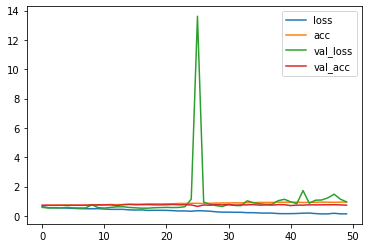

In [12]:
history_df = pd.DataFrame(history.history)
print(history_df)
history_df.plot()
plt.show()

In [13]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import shutil
from tensorflow.keras.applications.efficientnet import preprocess_input

In [14]:
def testing(path):
    files = os.listdir(path)
    df = pd.DataFrame(columns=['patient_id','number_of_images' ,'actual_diagnosis','prediction_negative_array','prediction_positive_array','predicted_diagnosis'])
    for f1 in files:
        file_p_n = os.listdir(path+'/'+f1)
        for f2 in file_p_n:
            p_n_str = f2.split('_')[1]
            img_files = os.listdir(path+'/'+f1+'/'+f2)
            n_imgs = len(img_files)
            pos_array = []
            neg_array = []
            for f3 in img_files:
                img = image.load_img(path+'/'+f1+'/'+f2+'/'+f3,target_size=(256,256))
                img = image.img_to_array(img)
                img = preprocess_input(img)
                img = np.expand_dims(img, axis = 0)
                prediction = model.predict(img)
#                 print(prediction)
                pos_array.append(prediction[0][1])
                neg_array.append(prediction[0][0])
            final_n = np.mean(neg_array)
            final_p = np.mean(pos_array)
            if final_p >= final_n:
                result = 'positive'
            else:
                result = 'negative'
            df = df.append({'patient_id':f1,'number_of_images':n_imgs,'actual_diagnosis':p_n_str,'prediction_negative_array':neg_array,'prediction_positive_array':pos_array,'predicted_diagnosis':result},ignore_index=True)
    return df

In [15]:
hand_testing = testing("C:/Users/patel/Desktop/Mini_Project/MURA-v1.1/MURA-v1.1/valid/XR_HAND")

In [16]:
# df1 = pd.read_csv('elbow_eff_83.csv')
df1 = hand_testing
cnt = 0
for i in range(148):
    if df1.iloc[i]["actual_diagnosis"] == df1.iloc[i]['predicted_diagnosis']:
        cnt+=1

print("Accuracy :",(cnt/158)*100)

Accuracy : 63.92405063291139


In [17]:
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(153):
    if (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        tp += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="negative"):
        fn += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "negative") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        fp += 1
    else:
        tn +=1

In [18]:
print("True Positive :", tp)
print("True Negative :", tn)
print("False Positive :", fp)
print("False Negative :", fn)


True Positive : 22
True Negative : 83
False Positive : 4
False Negative : 44


In [19]:
model.save_weights('hand_model.h5')